In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')
from scipy import stats
from scipy import stats

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [2]:
pre_LTD2 = pd.read_pickle('/data/ana_pre_2Hz_reci')
pre_LTD50 = pd.read_pickle('/data/ana_pre_50Hz_reci')
pre_LTD50_uni = pd.read_pickle('/data/ana_pre_50Hz_uni')

In [3]:
pre_LTD2

,Before,After,File name,elimi
107,"{'trace_y2': [[2.50217542194e-12, 2.4040573804...","{'trace_y2': [[1.86531331339e-12, 1.9492850318...",2017071401,30
108,"{'trace_y2': [[1.1491347566e-12, 1.16981543599...","{'trace_y2': [[2.87526061796e-12, 2.8776600874...",2017071902,30
109,"{'trace_y2': [[3.39565777933e-12, 3.5686863846...","{'trace_y2': [[5.86616976633e-13, 5.8520907506...",2017071903,25
110,"{'trace_y2': [[1.67792956567e-12, 1.6611027479...","{'trace_y2': [[6.40672673127e-12, 5.7930703833...",2017071903,30
111,"{'trace_y2': [[1.77759023169e-12, 1.9313973853...","{'trace_y2': [[1.11991850978e-12, 1.3682417467...",2017080401,40
113,"{'trace_y2': [[3.71880646563e-13, 4.9694007118...","{'trace_y2': [[9.26320781299e-13, 1.1754804152...",2017072102,25


In [4]:
pre_LTD50

,Before,After,File name,elimi
12,"{'trace_y2': [[1.12305151498e-11, 1.0818489180...","{'trace_y2': [[3.00457950006e-12, 3.6511581240...",2016092903,40
14,"{'trace_y2': [[1.30584784866e-12, 1.0710655162...","{'trace_y2': [[4.5351761458e-13, 6.77105602982...",2016091201,60
15,"{'trace_y2': [[1.79257063397e-12, 1.5553492803...","{'trace_y2': [[1.03174164102e-12, 1.2294640350...",2016100201,25
16,"{'trace_y2': [[9.67415878803e-14, 2.4534935102...","{'trace_y2': [[3.26327535786e-12, 3.1849338579...",2016100303,40
17,"{'trace_y2': [[2.25160733679e-12, 2.3108876951...","{'trace_y2': [[4.96848285459e-12, 3.5977987328...",2016100304,30
18,"{'trace_y2': [[2.73257882788e-12, 2.8357171590...","{'trace_y2': [[1.43215598984e-12, 1.3749670140...",2017021302,35


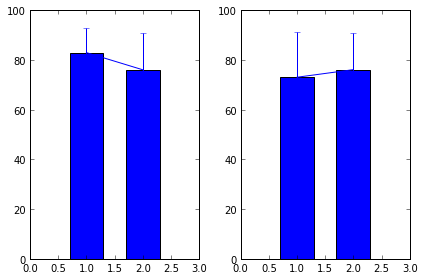

In [6]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_LTD2)):
    ir_bef_2.append(np.mean(pre_LTD2.Before.iloc[i]['ir']))
    ir_aft_2.append(np.mean(pre_LTD2.After.iloc[i]['ir'][-10:]))
    
for i in range(len(pre_LTD50)):
    ir_bef_50.append(np.mean(pre_LTD50.Before.iloc[i]['ir']))
    ir_aft_50.append(np.mean(pre_LTD50.After.iloc[i]['ir'][-10:]))


ir_bef2_mean = np.mean(ir_bef_2)
ir_bef2_std = np.std(ir_bef_2)
ir_aft2_mean = np.mean(ir_aft_2)
ir_aft2_std = np.std(ir_aft_2)
ir_bef50_mean = np.mean(ir_bef_50)
ir_bef50_std = np.std(ir_bef_50)
ir_aft50_mean = np.mean(ir_aft_50)
ir_aft50_std = np.std(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()

with PdfPages('/data/Supp2_B.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: Mean of empty slice


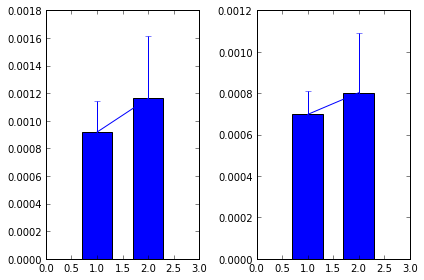

In [5]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_LTD2)):
    ir_bef_2.append(np.nanmean(pre_LTD2.Before.iloc[i]['onset_tau']))
    ir_aft_2.append(np.nanmean(pre_LTD2.After.iloc[i]['onset_tau'][-10:]))
    
for i in range(len(pre_LTD50)):
    ir_bef_50.append(np.nanmean(pre_LTD50.Before.iloc[i]['onset_tau']))
    ir_aft_50.append(np.nanmean(pre_LTD50.After.iloc[i]['onset_tau'][-10:]))


ir_bef2_mean = np.nanmean(ir_bef_2)
ir_bef2_std = np.nanstd(ir_bef_2)
ir_aft2_mean = np.nanmean(ir_aft_2)
ir_aft2_std = np.nanstd(ir_aft_2)
ir_bef50_mean = np.nanmean(ir_bef_50)
ir_bef50_std = np.nanstd(ir_bef_50)
ir_aft50_mean = np.nanmean(ir_aft_50)
ir_aft50_std = np.nanstd(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()
with PdfPages('/data/Supp2_C.pdf') as pdf:
    pdf.savefig()


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:12: RuntimeWarning: Mean of empty slice


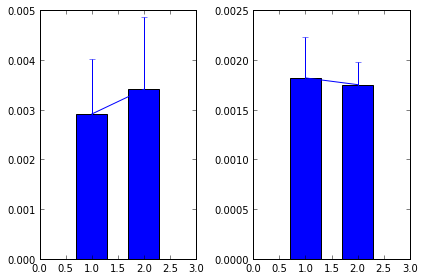

In [6]:
ir_bef_2 = []
ir_bef_50 = []
ir_aft_2 = []
ir_aft_50 = []

for i in range(len(pre_LTD2)):
    ir_bef_2.append(np.nanmean(pre_LTD2.Before.iloc[i]['decay_tau']))
    ir_aft_2.append(np.nanmean(pre_LTD2.After.iloc[i]['decay_tau'][-10:]))
    
for i in range(len(pre_LTD50)):
    ir_bef_50.append(np.nanmean(pre_LTD50.Before.iloc[i]['decay_tau']))
    ir_aft_50.append(np.nanmean(pre_LTD50.After.iloc[i]['decay_tau'][-10:]))


ir_bef2_mean = np.nanmean(ir_bef_2)
ir_bef2_std = np.nanstd(ir_bef_2)
ir_aft2_mean = np.nanmean(ir_aft_2)
ir_aft2_std = np.nanstd(ir_aft_2)
ir_bef50_mean = np.nanmean(ir_bef_50)
ir_bef50_std = np.nanstd(ir_bef_50)
ir_aft50_mean = np.nanmean(ir_aft_50)
ir_aft50_std = np.nanstd(ir_aft_50)

fig, ax = plt.subplots(1,2, sharex=True)
ax[0].bar([1,2], [ir_bef2_mean, ir_aft2_mean], align='center', width=0.6)
ax[0].errorbar(x=[1,2],y=[ir_bef2_mean, ir_aft2_mean], yerr=[ir_bef2_std, ir_aft2_std], fmt='')
ax[0].set_xlim(0,3)
ax[1].bar([1,2], [ir_bef50_mean, ir_aft50_mean], align='center', width=0.6)
ax[1].errorbar(x=[1,2],y=[ir_bef50_mean, ir_aft50_mean], yerr=[ir_bef50_std, ir_aft50_std], fmt='')
ax[1].set_xlim(0,3)

plt.tight_layout()
with PdfPages('/data/Supp2_D.pdf') as pdf:
    pdf.savefig()


/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

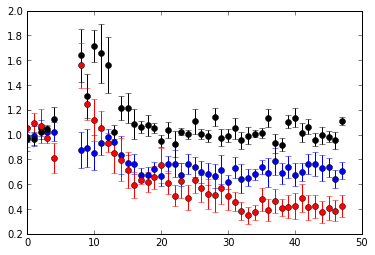

In [106]:
ave_ptl_resp = np.ones((len(pre_LTD2), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(pre_LTD2, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

ave_ptl_resp = np.ones((len(pre_LTD50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50, ave_ptl_50 = patch_pip.samp_ave(pre_LTD50, ave_ptl_resp)
ave_ptl_mean_50 = ave_ptl_mean_50[:-12]
ave_ptl_ste_50 = ave_ptl_ste_50[:-12]
ave_ptl_50 = ave_ptl_50[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ro')

ave_ptl_resp = np.ones((len(pre_LTD50_uni), 60))*np.nan
ave_ptl_mean_50_uni,ave_ptl_ste_50_uni, ave_ptl_50_uni = patch_pip.samp_ave(pre_LTD50_uni, ave_ptl_resp)
ave_ptl_mean_50_uni = ave_ptl_mean_50_uni[:-12]
ave_ptl_ste_50_uni = ave_ptl_ste_50_uni[:-12]
ave_ptl_50_uni = ave_ptl_50_uni[:, :-12]
plt.errorbar(x=np.arange(len(ave_ptl_mean_50_uni)), y=ave_ptl_mean_50_uni, yerr=ave_ptl_ste_50_uni, fmt='ko')

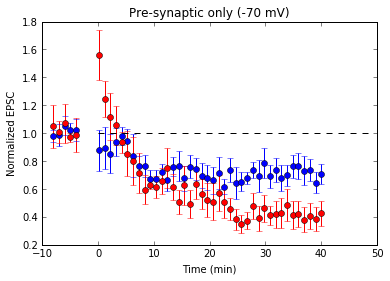

In [108]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_LTD2)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_50cp)- 6 * 4/3, len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ro', label='50Hz (n={a})'.format(a=len(pre_LTD50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure1_1.pdf') as pdf:
    pdf.savefig()

0.0239903776301


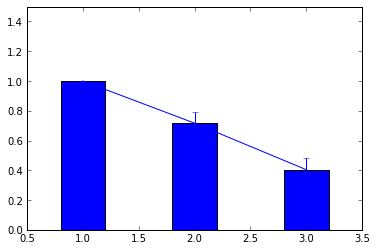

In [109]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -5:], axis=1))
mean_amp_aft_50Hz = np.nanmean(np.nanmean(ave_ptl_50[:, -5:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -5:], axis=1))/np.sqrt(6)
std_amp_aft_50Hz = np.nanstd(np.nanmean(ave_ptl_50[:, -5:], axis=1))/np.sqrt(6)
plt.bar([1,2,3], [1, mean_amp_aft_2Hz, mean_amp_aft_50Hz], align='center', width=0.4)
plt.errorbar(x=[1,2,3], y=[1, mean_amp_aft_2Hz, mean_amp_aft_50Hz],yerr = [0, std_amp_aft_2Hz, std_amp_aft_50Hz], fmt='')
plt.ylim([0,1.5])

_, p_val = stats.ttest_ind(np.nanmean(ave_ptl_2[:, -5:], axis=1), np.nanmean(ave_ptl_50[:, -5:], axis=1), nan_policy='omit')
print(p_val)

with PdfPages('/data/Figure1_4.pdf') as pdf:
    pdf.savefig()

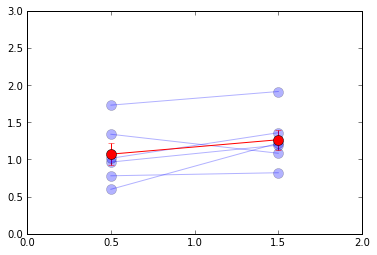

In [81]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_LTD50['Before'].loc[i]['PPR']) for i in pre_LTD50['Before'].index]
mean_PPR_aft = [np.nanmean(pre_LTD50['After'].loc[i]['PPR'][-10:]) for i in pre_LTD50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_1.pdf') as pdf:
    pdf.savefig()

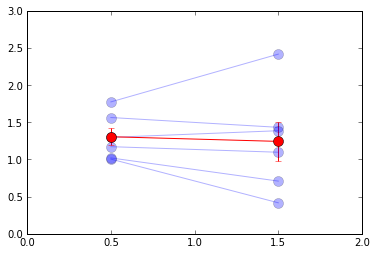

In [82]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_LTD2['Before'].loc[i]['PPR']) for i in pre_LTD2['Before'].index]
mean_PPR_aft = [np.nanmean(pre_LTD2['After'].loc[i]['PPR'][-10:]) for i in pre_LTD2['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
plt.ylim([0,3])
with PdfPages('/data/Supp1_2.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-2.9263908343359746, pvalue=0.032769690061389578)


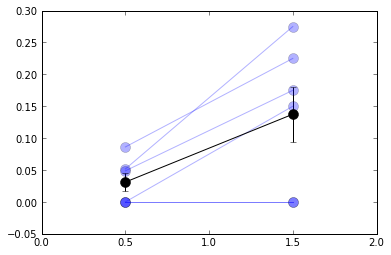

In [117]:
# Compare failure rate

mean_fail_bef = [np.sum(pre_LTD2['Before'].loc[i]['failure'])/len(pre_LTD2['Before'].loc[i]['failure']) for i in pre_LTD2['Before'].index]
mean_fail_aft = [np.sum(pre_LTD2['After'].loc[i]['failure'][-40:])/40 for i in pre_LTD2['After'].index]


print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure1_5.pdf') as pdf:
    pdf.savefig()

Ttest_relResult(statistic=-5.7393173531705024, pvalue=0.0022500336066969499)


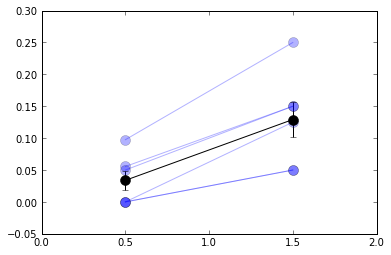

In [118]:
# Compare failure rate

mean_fail_bef = [np.sum(pre_LTD50['Before'].loc[i]['failure'])/len(pre_LTD50['Before'].loc[i]['failure']) for i in pre_LTD50['Before'].index]
mean_fail_aft = [np.sum(pre_LTD50['After'].loc[i]['failure'][-40:])/40 for i in pre_LTD50['After'].index]


print(stats.ttest_rel(mean_fail_bef, mean_fail_aft))

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
plt.ylim([-0.05,0.3])

with PdfPages('/data/Figure1_6.pdf') as pdf:
    pdf.savefig()

/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


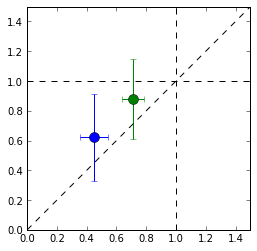

In [120]:
# CV analysis
r_50, pi_50 = patch_pip.cv_analysis(pre_LTD50, bef_len=15, aft_len=100)
r_50.pop(2)
pi_50.pop(2)

plt.errorbar(np.mean(pi_50), np.mean(r_50), np.std(r_50)/np.sqrt(len(r_50)), np.std(pi_50)/np.sqrt(len(pi_50)),  'o', markersize=10)

# CV analysis
r_2, pi_2 = patch_pip.cv_analysis(pre_LTD2, bef_len=15, aft_len=100)
plt.errorbar(np.mean(pi_2), np.mean(r_2), np.std(r_2)/np.sqrt(len(r_2)), np.std(pi_2)/np.sqrt(len(pi_2)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')

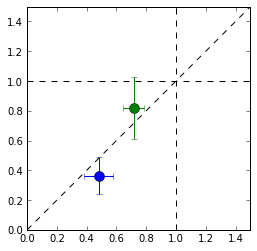

In [19]:
# CV analysis
cv_mean_bef = [np.nanmean(pre_LTD50['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_LTD50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_50[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_50.shape[0])]
               
cv_std_bef = [np.nanstd(pre_LTD50['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_LTD50['Before'].index]
end_aft = [pre_LTD50['elimi'].values[i] for i in range(len(pre_LTD50))]
cv_std_aft = [np.nanstd(pre_LTD50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_LTD50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

# CV analysis
cv_mean_bef = [np.nanmean(pre_LTD2['Before'].loc[i]['raw_amp1'][-20:]) for i in pre_LTD2['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(pre_LTD2['Before'].loc[i]['raw_amp1'][-15:]) for i in pre_LTD2['Before'].index]
end_aft = [pre_LTD2['elimi'].values[i] for i in range(len(pre_LTD2))]
cv_std_aft = [np.nanstd(pre_LTD2['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-100,0):end_aft[k]*3]) for k,i in enumerate(pre_LTD2['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.mean(pi), np.mean(r), np.std(r)/np.sqrt(len(r)), np.std(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
plt.xlim([0, 1.5])
plt.ylim([0, 1.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure1_7.pdf') as pdf:
    pdf.savefig()

[0, 60, 0.2, 2]

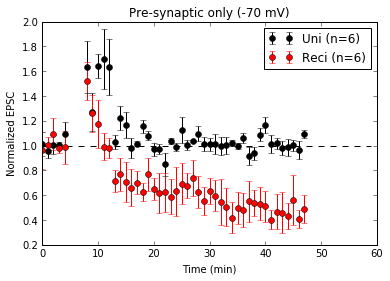

In [17]:
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50_uni, ave_ptl_ste_50_uni
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_LTD50_uni)))
plt.plot(np.ones((60))*1, 'k--')

ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50, ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_LTD50)))

plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Pre-synaptic only (-70 mV)')
plt.axis([0,60,0.2,2])